In [1]:
import tensorflow as tf

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

# Load data & EDA Data

In [2]:
df = pd.read_csv('data/Sunpots.csv', index_col=0)

In [3]:
df.head()

,Date,Monthly Mean Total Sunspot Number
0,1749-01-31,96.7
1,1749-02-28,104.3
2,1749-03-31,116.7
3,1749-04-30,92.8
4,1749-05-31,141.7


In [4]:
df.shape

(3235, 2)

<AxesSubplot:xlabel='Date', ylabel='Monthly Mean Total Sunspot Number'>

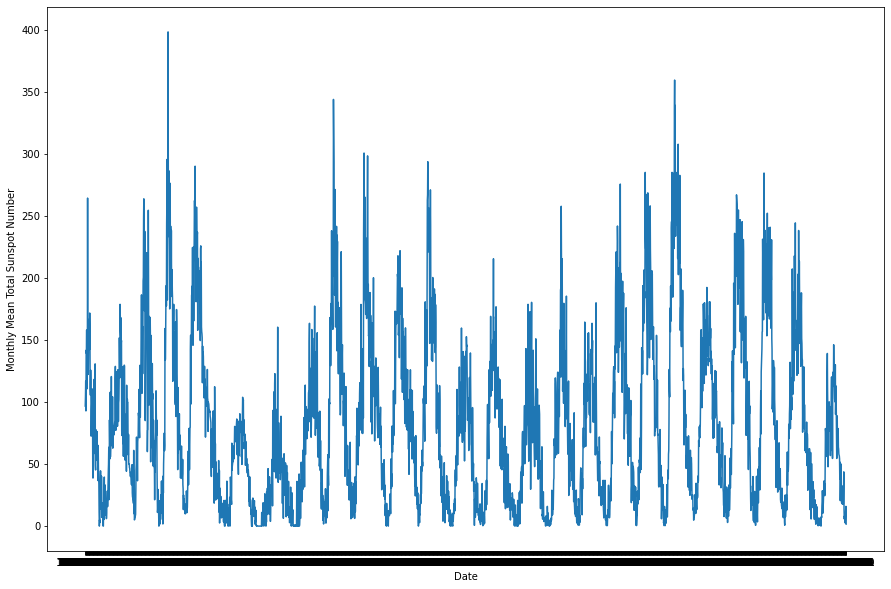

In [5]:
plt.figure(figsize=(15, 10))
sns.lineplot(data=df, x='Date', y='Monthly Mean Total Sunspot Number')

# Data preparation

In [6]:
train_df, test_df = train_test_split(df, test_size=0.2, random_state=2021)

In [7]:
train_data = train_df['Monthly Mean Total Sunspot Number']
train_time = train_df['Date']

test_data = test_df['Monthly Mean Total Sunspot Number']
test_time = test_df['Date']

In [17]:
# Create dataset
window_size = 60
train_dataset = tf.data.Dataset.from_tensor_slices((train_data))
train_dataset = train_dataset.window(window_size + 1, shift=1, drop_remainder=True)
train_dataset = train_dataset.flat_map(lambda window : window.batch(window_size + 1))
train_dataset = train_dataset.shuffle(len(train_data)).map(lambda window: (window[:-1], window[-1]))
train_dataset = train_dataset.batch(128).prefetch(tf.data.experimental.AUTOTUNE)

test_dataset = tf.data.Dataset.from_tensor_slices((test_data))
test_dataset = test_dataset.window(window_size + 1, shift=1, drop_remainder=True)
test_dataset = test_dataset.flat_map(lambda window : window.batch(window_size + 1))
test_dataset = test_dataset.map(lambda window: (window[:-1], window[-1]))
test_dataset = test_dataset.batch(128).prefetch(tf.data.experimental.AUTOTUNE)

In [18]:
train_dataset

<PrefetchDataset shapes: ((None, None), (None,)), types: (tf.float64, tf.float64)>

# Build & Train Model

In [142]:
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=window_size),
    tf.keras.layers.Dense(20),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dense(1)
])
model.compile(loss='mae', optimizer=tf.keras.optimizers.Adam(lr=1e-4), metrics=[tf.keras.metrics.MAE])
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_36 (Dense)             (None, 20)                1220      
_________________________________________________________________
activation_24 (Activation)   (None, 20)                0         
_________________________________________________________________
dense_37 (Dense)             (None, 10)                210       
_________________________________________________________________
activation_25 (Activation)   (None, 10)                0         
_________________________________________________________________
dense_38 (Dense)             (None, 1)                 11        
Total params: 1,441
Trainable params: 1,441
Non-trainable params: 0
_________________________________________________________________


In [143]:
history = model.fit(
    train_dataset, epochs=200, validation_data=test_dataset,
)

Epoch 1/200
40/40 [==============================] - 0s 4ms/step - loss: 86.1936 - mean_absolute_error: 86.1936 - val_loss: 73.8289 - val_mean_absolute_error: 73.8289
Epoch 2/200
40/40 [==============================] - 0s 3ms/step - loss: 73.3540 - mean_absolute_error: 73.3540 - val_loss: 66.1313 - val_mean_absolute_error: 66.1313
Epoch 3/200
40/40 [==============================] - 0s 3ms/step - loss: 68.6794 - mean_absolute_error: 68.6794 - val_loss: 64.0302 - val_mean_absolute_error: 64.0302
Epoch 4/200
40/40 [==============================] - 0s 3ms/step - loss: 67.0069 - mean_absolute_error: 67.0069 - val_loss: 62.9448 - val_mean_absolute_error: 62.9448
Epoch 5/200
40/40 [==============================] - 0s 3ms/step - loss: 65.8535 - mean_absolute_error: 65.8535 - val_loss: 62.2440 - val_mean_absolute_error: 62.2440
Epoch 6/200
40/40 [==============================] - 0s 3ms/step - loss: 64.9224 - mean_absolute_error: 64.9224 - val_loss: 61.6270 - val_mean_absolute_error: 61.627

Epoch 50/200
40/40 [==============================] - 0s 3ms/step - loss: 55.0205 - mean_absolute_error: 55.0205 - val_loss: 54.5278 - val_mean_absolute_error: 54.5278
Epoch 51/200
40/40 [==============================] - 0s 3ms/step - loss: 54.9333 - mean_absolute_error: 54.9333 - val_loss: 54.5264 - val_mean_absolute_error: 54.5264
Epoch 52/200
40/40 [==============================] - 0s 3ms/step - loss: 54.8721 - mean_absolute_error: 54.8721 - val_loss: 54.4736 - val_mean_absolute_error: 54.4736
Epoch 53/200
40/40 [==============================] - 0s 3ms/step - loss: 54.8266 - mean_absolute_error: 54.8266 - val_loss: 54.4818 - val_mean_absolute_error: 54.4818
Epoch 54/200
40/40 [==============================] - 0s 3ms/step - loss: 54.7633 - mean_absolute_error: 54.7633 - val_loss: 54.4256 - val_mean_absolute_error: 54.4256
Epoch 55/200
40/40 [==============================] - 0s 3ms/step - loss: 54.7052 - mean_absolute_error: 54.7052 - val_loss: 54.4199 - val_mean_absolute_error: 

Epoch 99/200
40/40 [==============================] - 0s 3ms/step - loss: 52.7389 - mean_absolute_error: 52.7389 - val_loss: 53.8170 - val_mean_absolute_error: 53.8170
Epoch 100/200
40/40 [==============================] - 0s 3ms/step - loss: 52.7051 - mean_absolute_error: 52.7051 - val_loss: 53.8006 - val_mean_absolute_error: 53.8006
Epoch 101/200
40/40 [==============================] - 0s 3ms/step - loss: 52.6735 - mean_absolute_error: 52.6735 - val_loss: 53.7901 - val_mean_absolute_error: 53.7901
Epoch 102/200
40/40 [==============================] - 0s 3ms/step - loss: 52.6398 - mean_absolute_error: 52.6398 - val_loss: 53.7786 - val_mean_absolute_error: 53.7786
Epoch 103/200
40/40 [==============================] - 0s 3ms/step - loss: 52.6188 - mean_absolute_error: 52.6188 - val_loss: 53.7844 - val_mean_absolute_error: 53.7844
Epoch 104/200
40/40 [==============================] - 0s 3ms/step - loss: 52.5709 - mean_absolute_error: 52.5709 - val_loss: 53.7865 - val_mean_absolute_er

40/40 [==============================] - 0s 3ms/step - loss: 51.0350 - mean_absolute_error: 51.0350 - val_loss: 53.6395 - val_mean_absolute_error: 53.6395
Epoch 148/200
40/40 [==============================] - 0s 3ms/step - loss: 50.9986 - mean_absolute_error: 50.9986 - val_loss: 53.6266 - val_mean_absolute_error: 53.6266
Epoch 149/200
40/40 [==============================] - 0s 3ms/step - loss: 50.9431 - mean_absolute_error: 50.9431 - val_loss: 53.6225 - val_mean_absolute_error: 53.6225
Epoch 150/200
40/40 [==============================] - 0s 3ms/step - loss: 50.9291 - mean_absolute_error: 50.9291 - val_loss: 53.6400 - val_mean_absolute_error: 53.6400
Epoch 151/200
40/40 [==============================] - 0s 3ms/step - loss: 50.9010 - mean_absolute_error: 50.9010 - val_loss: 53.6234 - val_mean_absolute_error: 53.6234
Epoch 152/200
40/40 [==============================] - 0s 3ms/step - loss: 50.8658 - mean_absolute_error: 50.8658 - val_loss: 53.6323 - val_mean_absolute_error: 53.6323


40/40 [==============================] - 0s 3ms/step - loss: 49.5890 - mean_absolute_error: 49.5890 - val_loss: 53.6854 - val_mean_absolute_error: 53.6854
Epoch 196/200
40/40 [==============================] - 0s 3ms/step - loss: 49.5903 - mean_absolute_error: 49.5903 - val_loss: 53.6448 - val_mean_absolute_error: 53.6448
Epoch 197/200
40/40 [==============================] - 0s 3ms/step - loss: 49.5295 - mean_absolute_error: 49.5295 - val_loss: 53.6500 - val_mean_absolute_error: 53.6500
Epoch 198/200
40/40 [==============================] - 0s 3ms/step - loss: 49.4939 - mean_absolute_error: 49.4939 - val_loss: 53.6532 - val_mean_absolute_error: 53.6532
Epoch 199/200
40/40 [==============================] - 0s 3ms/step - loss: 49.4657 - mean_absolute_error: 49.4657 - val_loss: 53.6813 - val_mean_absolute_error: 53.6813
Epoch 200/200
40/40 [==============================] - 0s 3ms/step - loss: 49.4361 - mean_absolute_error: 49.4361 - val_loss: 53.6412 - val_mean_absolute_error: 53.6412


# Model Evaluation

In [144]:
data = np.array(df['Monthly Mean Total Sunspot Number'].tolist())

In [145]:
input_data = []
for time in range(len(test_data) - window_size + 60):
    input_data.append(data[time:time + window_size][np.newaxis])

input_data = np.concatenate(input_data)
forecast = model.predict(input_data, verbose=True)[:, 0]

21/21 [==============================] - 0s 492us/step


In [146]:
# Overall Error
error = tf.keras.metrics.mean_absolute_error(test_data.tolist(), forecast).numpy()
print(error)

60.22675


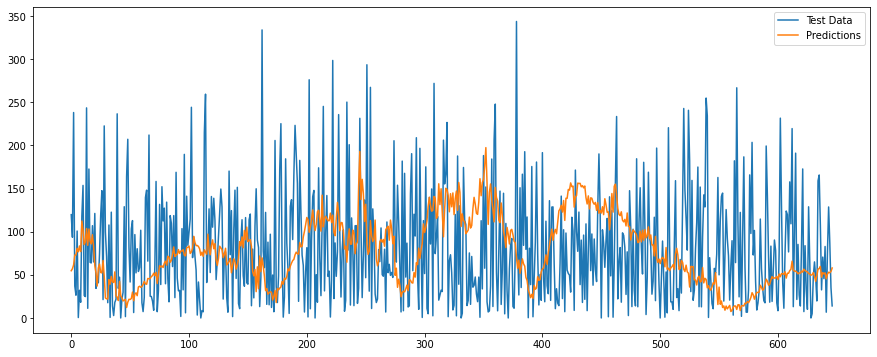

In [147]:
plt.figure(figsize=(15, 6))

plt.plot(list(range(len(test_data.tolist()))), test_data.tolist(), label = 'Test Data')
plt.plot(list(range(len(test_data.tolist()))), forecast, label = 'Predictions')
plt.legend()
plt.show()

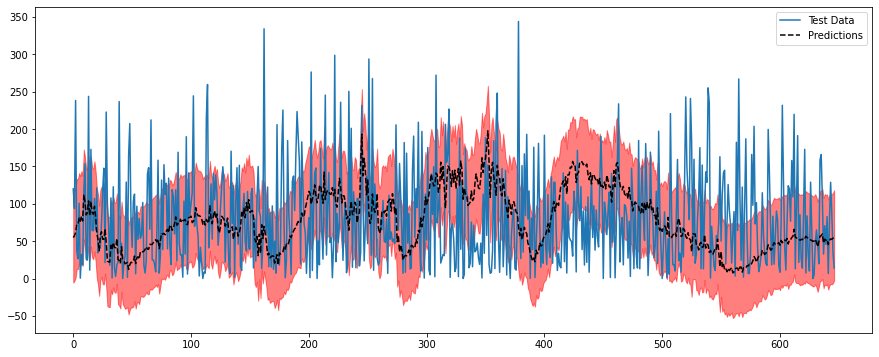

In [148]:
plt.figure(figsize=(15, 6))
# Plotting with Confidence Intervals
plt.plot(list(range(len(test_data.tolist()))), test_data.tolist(), label = 'Test Data')
plt.plot(list(range(len(test_data.tolist()))), forecast, label = 'Predictions', color = 'k', linestyle = '--')
plt.fill_between(list(range(len(test_data.tolist()))), forecast - error, forecast + error, alpha = 0.5, color = 'red')
plt.legend()
plt.show()